In [ ]:
!pip install basedosdados==2.0.0b16 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as ticker

# 1. Offline ou conectados? Classificação dos gastos das campanhas políticas

## Classificação das despesas

As despesas foram classificadas em 4 tipos (ver Freitas & Souza, 2023): tradicional, moderna, online e organizacional/outros. Utilizamos como base a coluna "origem_despesa" da tabela "[despesas_candidato](https://basedosdados.org/dataset/eef764df-bde8-4905-b115-6fc23b6ba9d6?table=98811854-da11-4c82-a1c0-9d88a81d4142)" na BD (DS_ORIGEM_DESPESA no [Portal de Dados Abertos](https://dadosabertos.tse.jus.br/) do TSE).

### Tradicional:
- Publicidade por materiais impressos; serviços prestados por terceiros; publicidade por adesivos; serviços advocatícios; despesas com pessoal; atividades de militância e mobilização de rua; serviços contábeis; diversas a especificar; combustíveis e lubrificantes; doações financeiras a outros candidatos/partidos; cessão ou locação de veículos; publicidades por carros de som; comícios; serviços próprios prestados por terceiros; eventos de promoção da candidatura; despesas com transporte ou deslocamento.

### Moderna
- Produção de programas de rádio, televisão ou vídeo; produção de jingles, vinhetas e slogans; pesquisas ou testes eleitorais; publicidade por jornais ou revistas.

### Online
- Despesa com impulsionamento de conteúdos; criação e inclusão de páginas na internet.

### Organizacional/outros
- Locação/cessão de bens móveis (exceto veículos); alimentação; materiais de expediente; encargos financeiros, taxas bancárias e/ou op. cartão de crédito; pré-instalação física de comitê de campanha; correspondências e despesas postais; água; despesas com hospedagem; impostos, contribuições e taxas; taxa de administração de financiamento coletivo; energia elétrica; despesa com geradores de energia; aquisição/doação de bens móveis ou imóveis; multas eleitorais; encargos sociais; telefone; passagem aérea; reembolsos de gastos realizados por eleitores; locação/cessão de bens imóveis.

Referência completa:
Freitas, A. & Souza, B. Prefeito tá on: Uma radiografia dos gastos com campanha online nas eleições de 2020. Conexão Política, vol. 12, n. 2, 2023.


In [ ]:
## online
select = """select dc.ano, dc.id_municipio,m.nome,m.sigla_uf,dc.sigla_partido,dc.cargo, sum(dc.valor_despesa) as total_online,
from `basedosdados.br_tse_eleicoes.despesas_candidato` dc
join `basedosdados.br_bd_diretorios_brasil.municipio` m
on m.id_municipio = dc.id_municipio
where (ano=2020 or ano=2024)
and (descricao_despesa like '%FACEBOOK%' or nome_fornecedor like '%FACEBOOK%'or nome_fornecedor_rf like '%FACEBOOK%'
or origem_despesa='despesa com impulsionamento de conteudos'
or origem_despesa='criacao e inclusao de paginas na internet'
or descricao_despesa like '%INSTAGRAM%' or nome_fornecedor like '%INSTAGRAM%'or nome_fornecedor_rf like '%INSTAGRAM%'
or descricao_despesa like '%TIK%TOK%' or nome_fornecedor like '%TIK%TOK%'or nome_fornecedor_rf like '%TIK%TOK%'
or descricao_despesa like '%YOUTUBE%' or nome_fornecedor like '%YOUTUBE%'or nome_fornecedor_rf like '%YOUTUBE%')
group by ano, id_municipio, m.nome, m.sigla_uf, dc.sigla_partido, dc.cargo"""

df_online = bd.read_sql(select, billing_project_id='testes-proforest')

Downloading: 100%|██████████|


In [ ]:
## tradicional
select = """select dc.ano, dc.id_municipio,m.nome,m.sigla_uf, dc.sigla_partido, dc.cargo, sum(dc.valor_despesa) as total_trad,
from `basedosdados.br_tse_eleicoes.despesas_candidato` dc
join `basedosdados.br_bd_diretorios_brasil.municipio` m
on m.id_municipio = dc.id_municipio
where (ano=2020 or ano=2024)
and (origem_despesa='publicidade por carros de som'
or origem_despesa='doacoes financeiras a outros candidatos/partidos'
or origem_despesa='comicios'
or origem_despesa='publicidade por jornais e revistas'
or origem_despesa='eventos de promocao da candidatura'
or origem_despesa='servicos proprios prestados por terceiros'
or origem_despesa='despesas com transporte ou deslocamento'
or origem_despesa='despesas com pessoal'
or origem_despesa='diversas a especificar'
or origem_despesa='comicios'
or origem_despesa='publicidade por adesivos'
or origem_despesa='combustiveis e lubrificantes'
or origem_despesa='cessao ou locacao de veiculos'
or origem_despesa='servicos contabeis'
or origem_despesa='servicos prestados por terceiros'
or origem_despesa='publicidade por materiais impressos'
or origem_despesa='atividades de militancia e mobilizacao de rua'
)
group by ano, id_municipio, m.nome, m.sigla_uf, dc.sigla_partido, dc.cargo"""

df_trad = bd.read_sql(select, billing_project_id='testes-proforest')

Downloading: 100%|██████████|


In [ ]:
## Moderna
select = """select dc.ano, dc.id_municipio,m.nome,m.sigla_uf, dc.sigla_partido, dc.cargo, sum(dc.valor_despesa) as total_moderna,
from `basedosdados.br_tse_eleicoes.despesas_candidato` dc
join `basedosdados.br_bd_diretorios_brasil.municipio` m
on m.id_municipio = dc.id_municipio
where (ano=2020 or ano=2024)
and (origem_despesa='publicidade por carros de som'
or origem_despesa='pesquisas ou testes eleitorais'
or origem_despesa='producao de jingles, vinhetas e slogans'
or origem_despesa='producao de programas de radio, televisao ou video'
)
group by ano, id_municipio, m.nome, m.sigla_uf, dc.sigla_partido, dc.cargo"""

df_mod = bd.read_sql(select, billing_project_id='testes-proforest')

Downloading: 100%|██████████|


In [ ]:
## outros
select = """select dc.ano, dc.id_municipio,m.nome,m.sigla_uf, dc.sigla_partido, dc.cargo, sum(dc.valor_despesa) as total_outros,
from `basedosdados.br_tse_eleicoes.despesas_candidato` dc
join `basedosdados.br_bd_diretorios_brasil.municipio` m
on m.id_municipio = dc.id_municipio
where (ano=2020 or ano=2024)
and (origem_despesa='locacao/cessao de bens moveis (exceto veiculos)'
or origem_despesa='pre-instalacao fisica de comite de campanha'
or origem_despesa='energia eletrica'
or origem_despesa='agua'
or origem_despesa='despesa com geradores de energia'
or origem_despesa='impostos, contribuicoes e taxas'
or origem_despesa='taxa de administracao de financiamento coletivo'
or origem_despesa='correspondencias e despesas postais'
or origem_despesa='despesas com hospedagem'
or origem_despesa='aquisicao/doacao de bens moveis ou imoveis'
or origem_despesa='multas eleitorais'
or origem_despesa='encargos sociais'
or origem_despesa='reembolsos de gastos realizados por eleitores'
or origem_despesa='telefone'
or origem_despesa='alimentacao'
or origem_despesa='servicos advocaticios'
or origem_despesa='materiais de expediente'
or origem_despesa='locacao/cessao de bens imoveis'
or origem_despesa='encargos financeiros, taxas bancarias e/ou op. cartao de credito'
or origem_despesa='passagem aerea'
)
group by ano, id_municipio, m.nome, m.sigla_uf, dc.sigla_partido, dc.cargo"""

df_outros = bd.read_sql(select, billing_project_id='testes-proforest')

Downloading: 100%|██████████|


In [ ]:
df = pd.merge(df_online, df_trad, on=['ano','id_municipio','nome','sigla_uf','sigla_partido','cargo'])
df = pd.merge(df, df_mod, on=['ano','id_municipio','nome','sigla_uf','sigla_partido','cargo'])
df = pd.merge(df, df_outros, on=['ano','id_municipio','nome','sigla_uf','sigla_partido','cargo'])
df = df.drop_duplicates()

Visão geral da proporção de gastos online pelos partidos

In [ ]:
df['prop_online'] = df['total_online'] / (df.total_online + df.total_trad + df.total_moderna +  df.total_outros )

<Axes: xlabel='prop_online', ylabel='sigla_partido'>

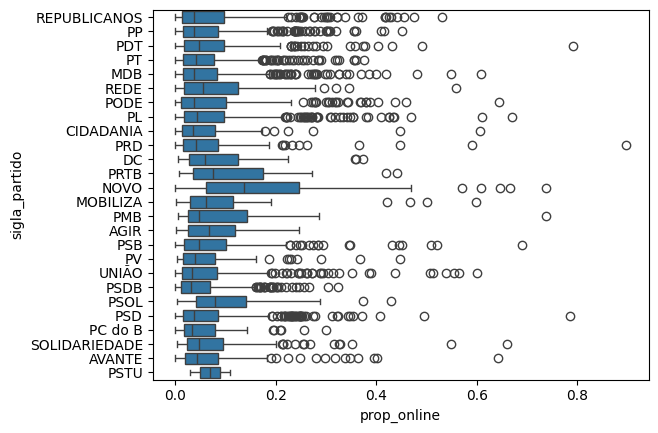

In [ ]:
df_2024 = df[df['ano']==2024]

sns.boxplot(df_2024,y='sigla_partido',x='prop_online')

### Separação por regiões

In [ ]:
regioes = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/refs/heads/main/csv/estados.csv')

In [ ]:
regioes=regioes[['uf','regiao']]

In [ ]:
df = df.merge(regioes, left_on='sigla_uf',right_on='uf')

In [ ]:
df.rename(columns={'nome':'cidade'})
df['total_trad_moderna'] = df.total_trad + df.total_moderna
df['total_total'] = df.total_trad + df.total_moderna + df.total_online + df.total_outros

In [ ]:
df_2024.id_municipio.nunique()

2166

### Separação dos municípios por tamanho, dado o número de eleitores.



In [ ]:
# separar municipios por porte.
select= "select id_municipio, aptos from `basedosdados.br_tse_eleicoes.detalhes_votacao_municipio` where ano=2020"

municipios = bd.read_sql(select,billing_project_id='testes-proforest')

Downloading: 100%|██████████|


In [ ]:
municipios.drop_duplicates('id_municipio')

,id_municipio,aptos
0,1100262,3412
2,1100700,7773
4,1100908,3116
6,1101302,9156
8,1101450,3279
...,...,...
11290,1501402,1009731
11293,5103403,378097
11296,2927408,1897098
11298,3303302,391268


In [ ]:
municipios = municipios.drop_duplicates('id_municipio')

In [ ]:
# Função para classificar com base no número de eleitores
def classificar_eleitores(aptos):
    if aptos > 200000:
        return 'Grande'
    elif 50000 < aptos <= 200000:
        return 'Médio grande'
    elif 10000 < aptos <= 50000:
        return 'Médio'
    elif 5000 < aptos <= 10000:
        return 'Médio pequeno'
    else:
        return 'Pequeno'

# Aplicação da função à coluna 'aptos' e criação da coluna 'categoria_municipio'
municipios['categoria_municipio'] = municipios['aptos'].apply(classificar_eleitores)

In [ ]:
df_2024.id_municipio.nunique()

2166

In [ ]:
df.merge(municipios)

,ano,id_municipio,nome,sigla_uf,sigla_partido,cargo,total_online,total_trad,total_moderna,total_outros,prop_online,uf,regiao,total_trad_moderna,total_total,aptos,categoria_municipio
0,2020,2403756,Fernando Pedroza,RN,REPUBLICANOS,prefeito,660.00,34875.14,1500.0,10000.00,0.014032,RN,Nordeste,36375.14,47035.14,3075,Pequeno
1,2020,4314902,Porto Alegre,RS,REPUBLICANOS,prefeito,42169.75,28175.41,234800.0,6651.07,0.135248,RS,Sul,262975.41,311796.23,1082726,Grande
2,2020,2910057,Dias d'Ávila,BA,PP,prefeito,8061.17,516858.32,4500.0,19525.00,0.014685,BA,Nordeste,521358.32,548944.49,51756,Médio grande
3,2020,3152204,Porteirinha,MG,PP,prefeito,2540.00,106361.55,39840.0,29086.65,0.014283,MG,Sudeste,146201.55,177828.20,30964,Médio
4,2020,3201308,Cariacica,ES,PT,prefeito,20865.99,644865.42,117200.0,161340.47,0.022097,ES,Sudeste,762065.42,944271.88,262414,Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,2024,4108403,Francisco Beltrão,PR,PSD,prefeito,11000.00,143042.80,3600.0,13171.40,0.064397,PR,Sul,146642.80,170814.20,66147,Médio grande
9907,2024,4106308,Corbélia,PR,PSOL,vereador,200.00,22764.50,2000.0,7700.00,0.006123,PR,Sul,24764.50,32664.50,14113,Médio
9908,2024,2109809,Santa Helena,MA,UNIÃO,prefeito,20000.00,69500.00,20750.0,61.50,0.181305,MA,Nordeste,90250.00,110311.50,21758,Médio
9909,2024,3516309,Francisco Morato,SP,MOBILIZA,vereador,300.00,19800.00,1000.0,2600.00,0.012658,SP,Sudeste,20800.00,23700.00,126392,Médio grande


In [ ]:
df = df.merge(municipios)

In [ ]:
df.to_csv('total_modalidades.csv', index=False)

In [ ]:
df = pd.read_csv('total_modalidades.csv')

In [ ]:
df.drop_duplicates()

,ano,id_municipio,nome,sigla_uf,sigla_partido,cargo,total_online,total_trad,total_moderna,total_outros,prop_online,uf,regiao,total_trad_moderna,total_total,aptos,categoria_municipio
0,2020,2403756,Fernando Pedroza,RN,REPUBLICANOS,prefeito,660.00,34875.14,1500.0,10000.00,0.014032,RN,Nordeste,36375.14,47035.14,3075,Pequeno
1,2020,4314902,Porto Alegre,RS,REPUBLICANOS,prefeito,42169.75,28175.41,234800.0,6651.07,0.135248,RS,Sul,262975.41,311796.23,1082726,Grande
2,2020,2910057,Dias d'Ávila,BA,PP,prefeito,8061.17,516858.32,4500.0,19525.00,0.014685,BA,Nordeste,521358.32,548944.49,51756,Médio grande
3,2020,3152204,Porteirinha,MG,PP,prefeito,2540.00,106361.55,39840.0,29086.65,0.014283,MG,Sudeste,146201.55,177828.20,30964,Médio
4,2020,3201308,Cariacica,ES,PT,prefeito,20865.99,644865.42,117200.0,161340.47,0.022097,ES,Sudeste,762065.42,944271.88,262414,Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,2024,4108403,Francisco Beltrão,PR,PSD,prefeito,11000.00,143042.80,3600.0,13171.40,0.064397,PR,Sul,146642.80,170814.20,66147,Médio grande
9907,2024,4106308,Corbélia,PR,PSOL,vereador,200.00,22764.50,2000.0,7700.00,0.006123,PR,Sul,24764.50,32664.50,14113,Médio
9908,2024,2109809,Santa Helena,MA,UNIÃO,prefeito,20000.00,69500.00,20750.0,61.50,0.181305,MA,Nordeste,90250.00,110311.50,21758,Médio
9909,2024,3516309,Francisco Morato,SP,MOBILIZA,vereador,300.00,19800.00,1000.0,2600.00,0.012658,SP,Sudeste,20800.00,23700.00,126392,Médio grande


In [ ]:
df

,ano,id_municipio,nome,sigla_uf,sigla_partido,cargo,total_online,total_trad,total_moderna,total_outros,prop_online,uf,regiao,total_trad_moderna,total_total,aptos,categoria_municipio
0,2020,2403756,Fernando Pedroza,RN,REPUBLICANOS,prefeito,660.00,34875.14,1500.0,10000.00,0.014032,RN,Nordeste,36375.14,47035.14,3075,Pequeno
1,2020,4314902,Porto Alegre,RS,REPUBLICANOS,prefeito,42169.75,28175.41,234800.0,6651.07,0.135248,RS,Sul,262975.41,311796.23,1082726,Grande
2,2020,2910057,Dias d'Ávila,BA,PP,prefeito,8061.17,516858.32,4500.0,19525.00,0.014685,BA,Nordeste,521358.32,548944.49,51756,Médio grande
3,2020,3152204,Porteirinha,MG,PP,prefeito,2540.00,106361.55,39840.0,29086.65,0.014283,MG,Sudeste,146201.55,177828.20,30964,Médio
4,2020,3201308,Cariacica,ES,PT,prefeito,20865.99,644865.42,117200.0,161340.47,0.022097,ES,Sudeste,762065.42,944271.88,262414,Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,2024,4108403,Francisco Beltrão,PR,PSD,prefeito,11000.00,143042.80,3600.0,13171.40,0.064397,PR,Sul,146642.80,170814.20,66147,Médio grande
9907,2024,4106308,Corbélia,PR,PSOL,vereador,200.00,22764.50,2000.0,7700.00,0.006123,PR,Sul,24764.50,32664.50,14113,Médio
9908,2024,2109809,Santa Helena,MA,UNIÃO,prefeito,20000.00,69500.00,20750.0,61.50,0.181305,MA,Nordeste,90250.00,110311.50,21758,Médio
9909,2024,3516309,Francisco Morato,SP,MOBILIZA,vereador,300.00,19800.00,1000.0,2600.00,0.012658,SP,Sudeste,20800.00,23700.00,126392,Médio grande


## 1.1 Candidaturas a prefeito ou a vereador, investimento online

Como já é previsto, candidatos a prefeito gastam muito mais em campanha. Mas queremos ver proporcionalmente, se há uma variação. Afinal, com menos dinheiro disponível seria possível que candidatos a vereância preferissem focar em campanha online

### Candidatos a prefeito
- por região
- por porte de município

(Para avaliar os candidatos a vereador, basta trocar o filtro utilizado aqui).

In [ ]:
#regiao = 'Centro-Oeste'
cargo = 'prefeito'
ano = 2024



#dados = df[df['regiao']==regiao]
dados = df[df['cargo']==cargo]
dados = dados[dados['ano']==ano]

In [ ]:
dados = dados.groupby(by=['regiao','categoria_municipio']).sum()

In [ ]:
dados = dados[['total_online','total_trad','total_moderna','total_outros']]
dados['total_total']=dados.total_online + dados.total_trad + dados.total_moderna + dados.total_outros
dados['prop_online'] =100* dados.total_online / dados.total_total
dados['prop_trad'] = 100*dados.total_trad / dados.total_total
dados['prop_moderna'] = 100*dados.total_moderna / dados.total_total
dados['prop_outros'] = 100*dados.total_outros / dados.total_total
dados = dados[['prop_online','prop_trad','prop_moderna','prop_outros']]

In [ ]:
dados = dados.reset_index()


In [ ]:
!pip install -U kaleido -q

In [ ]:
import kaleido

In [ ]:
fig = px.bar(dados, x="categoria_municipio",
             y=["prop_online", "prop_trad", "prop_moderna","prop_outros"],
             animation_frame='regiao',
             title="Proporção de diferentes tipos de gastos em municípios de diferentes portes")
fig.update_layout(paper_bgcolor="#FFFFFF", plot_bgcolor='rgba(0, 0, 0, 0)',)
fig.update_layout(
    font_family="Ubuntu")
fig.update_xaxes(title="")
fig.update_yaxes(title="Proporção (%)")
fig.show()
#fig.write_image("fig1.svg")

In [ ]:
dados

,regiao,categoria_municipio,prop_online,prop_trad,prop_moderna,prop_outros
0,Centro-Oeste,Grande,6.810768,80.790382,3.494167,8.904683
1,Centro-Oeste,Médio,4.445298,87.023583,4.918390,3.612730
2,Centro-Oeste,Médio grande,5.564028,85.613525,3.656255,5.166193
3,Centro-Oeste,Médio pequeno,3.505815,84.619763,2.995628,8.878794
4,Centro-Oeste,Pequeno,2.418310,80.053323,4.886584,12.641782
5,Nordeste,Grande,4.694531,81.407256,3.862223,10.035990
6,Nordeste,Médio,2.756216,79.362554,7.836526,10.044703
7,Nordeste,Médio grande,3.310549,84.055822,5.603156,7.030473
8,Nordeste,Médio pequeno,4.605428,71.309401,8.809957,15.275214
9,Nordeste,Pequeno,4.424825,69.549210,8.966153,17.059813


In [ ]:
regiao = 'Sul'
d =dados[dados['regiao']==regiao]

fig = px.bar(d, x="categoria_municipio",
             y=["prop_online", "prop_trad", "prop_moderna","prop_outros"])
fig.update_layout(paper_bgcolor="#FFFFFF", plot_bgcolor='rgba(0, 0, 0, 0)',)
fig.update_layout(
    font_family="Ubuntu")
fig.update_xaxes(title="")
fig.update_yaxes(title="Proporção (%)")
fig.update_traces({'name':'Online'},selector={'name':'prop_online'}, marker={'color':'#004529'})
fig.update_traces({'name':'Tradicional'},selector={'name':'prop_trad'}, marker={'color':'#2b8c4d'})
fig.update_traces({'name':'Moderna'},selector={'name':'prop_moderna'}, marker={'color':'#77c679'})
fig.update_traces({'name':'Outros'},selector={'name':'prop_outros'}, marker={'color':'#ccedc6'})

fig.update_layout(height=450, width=750, showlegend=True)
fig.update_layout(paper_bgcolor="#FFFFFF", plot_bgcolor='rgba(0, 0, 0, 0)',)
fig.update_layout(font_family="Ubuntu")
fig.update_layout(title=f"""Proporção de gastos em diferentes modalidades - {regiao}<br>Candidatos a Prefeito""")
fig.update_layout(legend_title='')
fig.show()

fig.write_image(f"prop_{regiao}.svg")

In [ ]:

from plotly.subplots import make_subplots
import numpy as np

fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.06,
                    subplot_titles =['Norte','Nordeste','Centro-Oeste','Sudeste','Sul'])

regioes = ['Norte','Nordeste','Centro-Oeste','Sudeste','Sul']

fig.add_trace(go.Bar(name='Online', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[0]]['prop_online'], marker_color="#004529", legendgroup="Online"),
                row=1, col=1)
fig.add_trace(go.Bar(name='Moderna', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[0]]['prop_moderna'], marker_color="#2b8c4d", legendgroup="Moderna"),
                row=1, col=1)
fig.add_trace(go.Bar(name='Tradicional', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[0]]['prop_trad'], marker_color="#77c679", legendgroup="Tradicional"),
                row=1, col=1)
fig.add_trace(go.Bar(name='Outros', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[0]]['prop_outros'], marker_color="#ccedc6", legendgroup="Outros"),
                row=1, col=1)

for i in np.arange(2,6):
  fig.add_trace(go.Bar(name='Online', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[i-1]]['prop_online'], marker_color="#004529", legendgroup="Online", showlegend=False),
                row=i, col=1)
  fig.add_trace(go.Bar(name='Moderna', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[i-1]]['prop_moderna'], marker_color="#2b8c4d", legendgroup="Moderna", showlegend=False),
                row=i, col=1)
  fig.add_trace(go.Bar(name='Tradicional', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[i-1]]['prop_trad'], marker_color="#77c679", legendgroup="Online", showlegend=False),
                row=i, col=1)
  fig.add_trace(go.Bar(name='Outros', x=dados['categoria_municipio'], y=dados[dados.regiao ==regioes[i-1]]['prop_outros'], marker_color="#ccedc6", legendgroup="Moderna", showlegend=False),
                row=i, col=1)

fig.update_layout(height=800, width=650, showlegend=True)
fig.update_layout(paper_bgcolor="#FFFFFF", plot_bgcolor='rgba(0, 0, 0, 0)',)
fig.update_layout(font_family="Ubuntu")
fig.update_layout(barmode='stack')
fig.update_layout(title="Proporção de gastos em diferentes modalidades")
fig.show()
fig.write_image("fig1.svg")

## 1.2 Comparativo por ano dos gastos online nas últimas eleições

In [ ]:
df_2020 = df[df.ano==2020]

In [ ]:
cargo = 'vereador'
dados = df[df['cargo']==cargo]


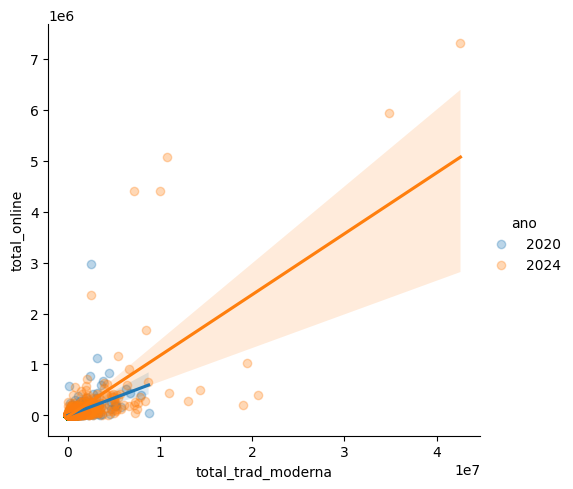

In [ ]:
sns.lmplot(data=dados, x='total_trad_moderna', y='total_online', hue='ano',scatter_kws={'alpha':0.3})

In [ ]:
# ver quem é esse ponto específico que destoa do resto.
dados[dados['total_online']==dados.total_online.max()]

,ano,id_municipio,nome,sigla_uf,sigla_partido,cargo,total_online,total_trad,total_moderna,total_outros,prop_online,uf,regiao,total_trad_moderna,total_total,aptos,categoria_municipio
489,2024,3550308,São Paulo,SP,PSOL,prefeito,7313000.0,42239973.65,338145.0,1949511.06,0.141067,SP,Sudeste,42578118.65,51840629.71,8986687,Grande


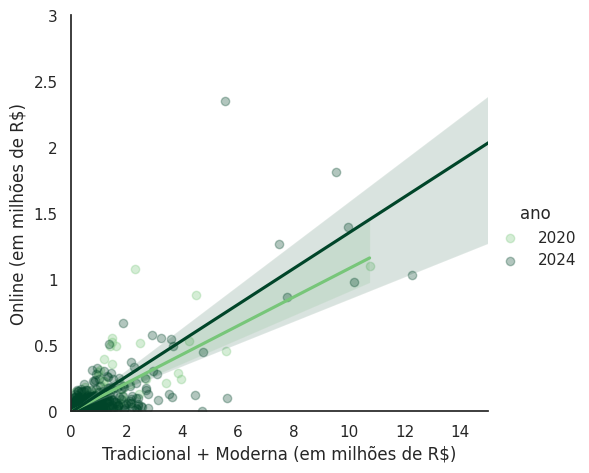

In [ ]:
#fig, ax = plt.subplots()

plot = sns.lmplot(data=dados, x='total_trad_moderna', y='total_online', hue='ano',scatter_kws={'alpha':0.3},
                  palette={2024:'#004529',2020:'#77c679'})
ax = plot.axes[0,0]
ax.set_ylim(0,3000000)
ax.set_xlim(0,15000000)
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Online (em milhões de R$)')
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.xaxis.set_major_formatter(ticks_y)
ax.set_xlabel('Tradicional + Moderna (em milhões de R$)')
sns.set_theme(style="white",rc={'figure.figsize':(30,15)})
plt.savefig('vereadores_anos.svg')
fig.show()

In [ ]:
df_2020.id_municipio.nunique()

1317

In [ ]:
sns.lmplot(data=dados, x='total_trad_moderna', y='total_online', hue='ano',scatter_kws={'alpha':0.1})


In [ ]:
dados = dados.groupby(by=['ano']).sum()[['total_online','total_resto']]
dados['prop_online'] = dados.total_online / (dados.total_resto + dados.total_online)
dados['prop_resto'] = dados.total_resto / (dados.total_resto + dados.total_online)
dados = dados[['prop_online','prop_resto']]

In [ ]:
dados

,prop_online,prop_resto
ano,,
2020,0.062089,0.937911
2024,0.066283,0.933717
